# This is Estelle's notebook

## Web scrapping to get the series symbol and names

In [26]:
import cv2
# import pytesseract

import requests
from bs4 import BeautifulSoup
import httpx

import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://cardmavin.com/pokemon/pokemon-card-set-symbols'

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")


In [3]:
items = soup.find_all('tr')

In [4]:
dicty_full = {'name': [], 'link': []}

for item in items:
    if item.find('td', class_='column-3'):
        name = item.find('td', class_='column-1').find('a').text
        links = item.find('td', class_='column-3').find_all("img")
        
        if len(links) > 1:
            for i, link in enumerate(links):
                dicty_full['name'].append( f"{name}_{i}" )
                dicty_full['link'].append( link.attrs["data-src"] )
        elif len(links) == 1:
            dicty_full['name'].append( f"{name}" )
            dicty_full['link'].append( item.find('td', class_='column-3').find("img").attrs["data-src"] )


In [7]:
for i, thing in enumerate(dicty_full['name']):
    with open(f"../raw_data/SetSymbols/{dicty_full['name'][i]}.png", "wb") as file:
        image = httpx.get(dicty_full["link"][i])
        # Save the image binary data into the file
        file.write(image.content)
        print(f"Image {dicty_full['name'][i]} has been scraped")

print("Image saving is done")

Image Scarlet & Violet 151 has been scraped
Image Obsidian Flames has been scraped
Image Paldea Evolved has been scraped
Image Scarlet & Violet has been scraped
Image Crown Zenith has been scraped
Image Silver Tempest has been scraped
Image Lost Origin has been scraped
Image Pokemon GO has been scraped
Image Astral Radiance has been scraped
Image Brilliant Stars has been scraped
Image Fusion Strike has been scraped
Image Celebrations has been scraped
Image Celebrations Classic Collection has been scraped
Image Evolving Skies has been scraped
Image Chilling Reign has been scraped
Image Battle Styles has been scraped
Image Shining Fates has been scraped
Image Vivid Voltage has been scraped
Image Champion's Path has been scraped
Image Darkness Ablaze has been scraped
Image Rebel Clash has been scraped
Image Sword & Shield has been scraped
Image Cosmic Eclipse has been scraped
Image Hidden Fates has been scraped
Image Unified Minds has been scraped
Image Unbroken Bonds has been scraped
Ima

## Optical Character Recognition

In [45]:
#Loading image using OpenCV

img = cv2.imread('../raw_data/PokemonCards/white_background/IMG_1487.jpeg')

#Converting to text
text = pytesseract.image_to_string(img)
 
print(text)

2 Se

” Po =a “ ‘
ee pat oe — ee —

NO. 647 Colt Pokémon HI. 4'7" WT. 100.9 Ibs, , |

p/ Creatures / GAME FREAK

©2022 Pokémon / Nintend
: am




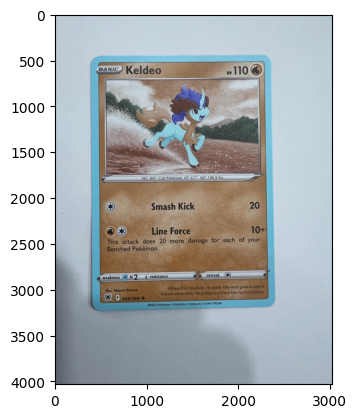

In [44]:
plt.imshow(img)

## Make dataset

In [19]:
from PIL import Image
from io import BytesIO

In [51]:
s_id = 'xy1'
p_id = '100'

url = f'https://api.pokemontcg.io/v2/cards/{s_id}-{p_id}'
response = requests.get(url).json()
image_url = response['data']['images']['large']
# Send a GET request to the image URL
response_card = requests.get(image_url)
# Check if the request was successful
if response_card.status_code == 200:
    # Open the image using PIL
    image = Image.open(BytesIO(response_card.content))

    # Save the image to a file
    # image.save("../raw_data/pokemon_card.png")
    # print("Image saved successfully!")
else:
    print(f"Failed to retrieve image. HTTP Status code: {response_card.status_code}")


In [44]:
grayImage = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)


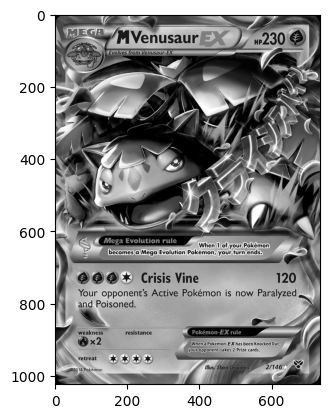

In [45]:
plt.imshow(grayImage, cmap='gray')

In [29]:
width, height = image.size

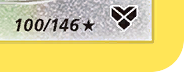

In [52]:
image.crop((width*0.75, height*0.93, width, height))

In [ ]:
s_id = 'xy1'

for i in range(1,21):
    p_id = str(i) #'2'

    url = f'https://api.pokemontcg.io/v2/cards/{s_id}-{p_id}'
    response = requests.get(url).json()
    image_url = response['data']['images']['large']

    # Send a GET request to the image URL
    response_card = requests.get(image_url)

    # Check if the request was successful
    if response_card.status_code == 200:
        # Open the image using PIL
        image = Image.open(BytesIO(response_card.content))
    
        # Save the image to a file
        # image.save("../raw_data/pokemon_card.png")
        # print("Image saved successfully!")
    else:
        print(f"Failed to retrieve image. HTTP Status code: {response_card.status_code}")


In [55]:
np.array(
    [['dv1', 'Dragon Vault', 'right'], 
     ['swsh9-81', 'Brilliant Stars', 'left'],
     ['swsh45-11', 'Shining Fates', 'left'],
     ['swsh6-16', 'Chilling Reign', 'left'],
     ['swsh12pt5', 'Crown Zenith', 'left'],
     ['xy1-94', 'XY base', 'right'],
     ['sm4-76', 'Crimson Invasion', 'left'],
     ['swsh10-8', 'Astral Radiance', 'left'],
     ['swsh10-45', 'Astral Radiance', 'left'],
     ['sv2-32', 'Paldea Evolved', 'left']])

array([['dv1', 'Dragon Vault', 'right'],
       ['swsh9-81', 'Brilliant Stars', 'left'],
       ['swsh45-11', 'Shining Fates', 'left'],
       ['swsh6-16', 'Chilling Reign', 'left'],
       ['swsh12pt5', 'Crown Zenith', 'left'],
       ['xy1-94', 'XY base', 'right'],
       ['sm4-76', 'Crimson Invasion', 'left'],
       ['swsh10-8', 'Astral Radiance', 'left'],
       ['swsh10-45', 'Astral Radiance', 'left'],
       ['sv2-32', 'Paldea Evolved', 'left']], dtype='<U16')